# Preprocessing

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
import seeg_library as slib
import seeg_constants as CONST

In [14]:
# Constants
patient = 'p13'
analysisType = "behavior"  # On what even to align stroop tasks. Choose "start" (trial start), "stim" (stimulus onset), or "key" (keypress)

In [15]:
csv_path = "behavior/" +  patient + "_dd_" + analysisType + "_run"

In [17]:
#Combine runs
df_lst = []
for i in range (2):
    print(i)
    experiment = str(i+1) 
    path_csv = csv_path + experiment + ".csv"
    df = pd.read_csv(path_csv)
    df_lst.append(df)
combined_df = pd.concat(df_lst, ignore_index=True)
combined_df.to_csv('combined_dd_behavior.csv', index=False)

0
1


# Visualization

In [19]:
#String-to-float conversion method
def time_string_to_seconds(time_str):
    if time_str.count(':') == 2:
        # Format HH:MM:SS.SSSS
        h, m, s = map(float, time_str.split(':'))
        return h * 3600 + m * 60 + s
    elif time_str.count(':') == 1:
        # Format MM:SS.S
        m, s = map(float, time_str.split(':'))
        return m * 60 + s
    else:
        raise ValueError("Time format not recognized")

In [20]:
#Adding reaction times column to dataframe
combined_df['stim_time_seconds'] = combined_df['stim_time'].apply(time_string_to_seconds)
combined_df['stim_time_seconds'] = combined_df['stim_time_seconds'].astype('float64')
combined_df['choice_time_seconds'] = combined_df['choice_time'].apply(time_string_to_seconds)
combined_df['choice_time_seconds'] = combined_df['choice_time_seconds'].astype('float64')

combined_df['reaction_time'] = combined_df['choice_time_seconds'] - combined_df['stim_time_seconds']
combined_df['reaction_time'] = combined_df['reaction_time'].astype('float64')

In [30]:
for i in range(len(combined_df)):
    if combined_df['choice'].iloc[i] == 'immediate':
        combined_df['choice_binary'].iloc[i] = 0 
    elif combined_df['choice'].iloc[i] == 'delay':
        combined_df['choice_binary'].iloc[i] = 1

/var/folders/_9/b52xzjr17jg846fw21mn42tr0000gn/T/ipykernel_24587/1208557371.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined_df['choice_binary'].iloc[i] = 0
/var/folders/_9/b52xzjr17jg846fw21mn42tr0000gn/T/ipykernel_24587/1208557

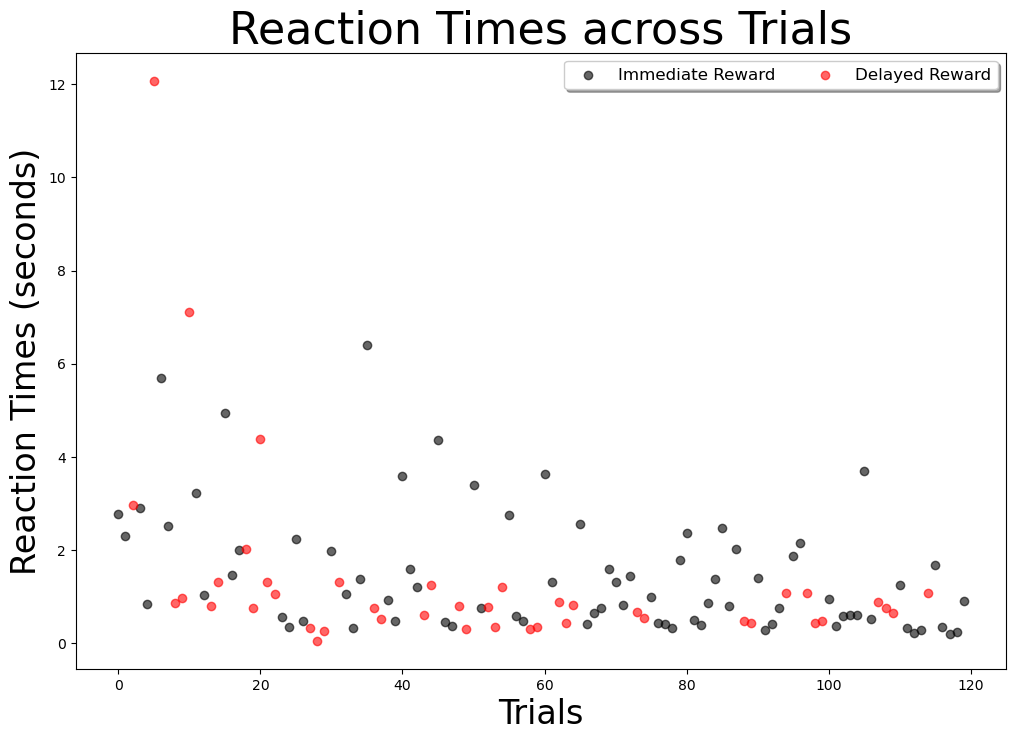

In [29]:
# Create a color map
colors = {0: 'black', 1: 'red'}

# Create a plot
plt.figure(figsize=(12, 8))

# Plot the points with colors based on the stop_signal
for delay in combined_df['choice_binary'].unique():
    subset = combined_df[combined_df['choice_binary'] == delay]
    plt.scatter(subset.index, subset['reaction_time'],
                c=colors[delay],
                alpha=0.6,
                label=f'Delay {delay}')

# Add labels and title
plt.xlabel('Trials', fontsize = 24)
plt.ylabel('Reaction Times (seconds)', fontsize = 24)
plt.title('Reaction Times across Trials', fontsize = 32)

# Customize the legend with specific labels
plt.legend(
    loc='best',          # Automatically find the best location
    fontsize='large',    # Set the font size
    frameon=True,        # Show the frame
    shadow=True,         # Add a shadow to the legend
    ncol=2,              # Two columns in the legend
    labels=['Immediate Reward', 'Delayed Reward']  # Custom labels
)

# Show the plot
plt.show()